In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split

from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import recall_score, precision_score

from sklearn.metrics import roc_curve, roc_auc_score
 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

## 랜덤포레스트
#### <img src='img/randomforest.png' width='50%'>
* 앙상블 학습 알고리즘 중 대표적인 학습 알고리즘
* 여러 개의 의사결정나무들을 생성한 다음,
* 각 개별 트리의 예측값들 중에서 가장 많이 선택된 클래스로 예측하는 알고리즘
* 물론, 배깅분류기에 의사결정트리를 넣는 대신 결정트리에 최적화되어 있는 포레스트분류기를 사용

### 테스트용 데이터 생성 및 분할

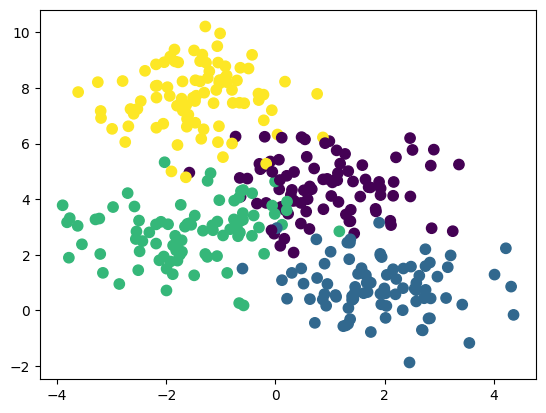

In [3]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=350, centers=4,
                  random_state=0, cluster_std=1.0)
plt.scatter(X[:,0], X[:,1], c=y, s=55)
plt.show()

In [4]:
X_train, X_test, Y_train,Y_test = train_test_split(X,y, train_size=0.7, stratify=y, random_state=2211211555)

### 랜덤포레스트 분류

In [5]:
# criterion : 정보혼잡도 알고리즘 지정
rfclf = RandomForestClassifier(n_estimators=100, n_jobs=-1,
                               oob_score=True, criterion='entropy')
rfclf.fit(X_train,Y_train)

RandomForestClassifier(criterion='entropy', n_jobs=-1, oob_score=True)

In [6]:
rfclf.oob_score_

0.8934426229508197

In [7]:
pred = rfclf.predict(X_test)
accuracy_score(Y_test,pred)

0.9339622641509434

### 결정영역 시각화

C:\Users\LG PC\lib\site-packages\mlxtend\plotting\decision_regions.py:300: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


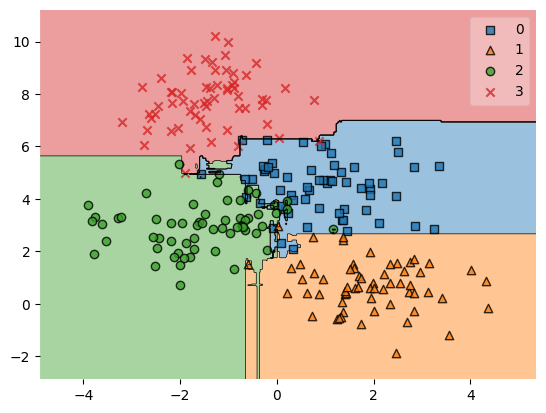

In [8]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_train,Y_train,rfclf)
plt.show()

## 특성 중요도
* 랜덤포레스트 분류기의 장점은 특성의 중요도를 측정할 수 있음
* 어떤 특성이 불순도를 낮추는지 확인하여 중요도를 측정
* feature_importances_를 이용해서 중요도 출력가능

## 과일, 채소 구분하기

In [9]:
fresh = pd.read_csv('data/fresh.csv', encoding='euc-kr')
fresh.columns = ['name','sweet','crunchy','class']

In [10]:
data = fresh.iloc[:,1:3]
target = fresh['class'].map({'과일':0,'단백질':1,'채소':2})

In [11]:
X_train, X_test, Y_train,Y_test = train_test_split(data,target, train_size=0.7, stratify=target, random_state=2211211800)

In [12]:
rfclf = RandomForestClassifier(n_estimators=100, n_jobs=-1,
                               oob_score=True, criterion='entropy')
rfclf.fit(data,target)

RandomForestClassifier(criterion='entropy', n_jobs=-1, oob_score=True)

In [13]:
rfclf.oob_score_

0.8

In [14]:
pred = rfclf.predict(X_test)
accuracy_score(Y_test,pred)

1.0

### 결정영역 시각화

C:\Users\LG PC\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


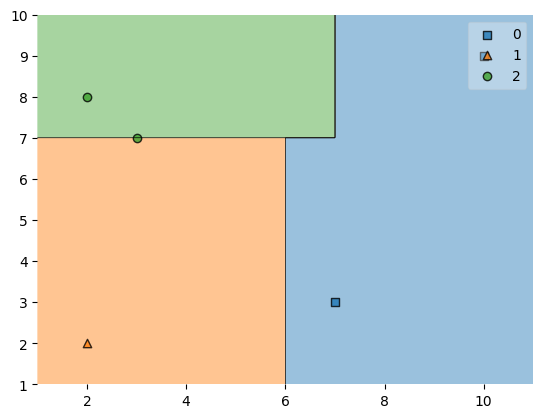

In [15]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_test.to_numpy(),pred,rfclf)
plt.show()

In [16]:
rfclf.feature_importances_

array([0.54817154, 0.45182846])

## 농구선수 게임데이터를 이용해서 포지션 예측

In [28]:
bbplayer = pd.read_csv('data/bbplayer.csv')
bbplayer.head(3)

,Player,Pos,3P,2P,TRB,AST,STL,BLK
0,Alex Abrines,SG,1.4,0.6,1.3,0.6,0.5,0.1
1,Steven Adams,C,0.0,4.7,7.7,1.1,1.1,1.0
2,Alexis Ajinca,C,0.0,2.3,4.5,0.3,0.5,0.6


In [29]:
data = bbplayer.iloc[:,2:8]
target = bbplayer.Pos.map({'C':0,'SG':1})

In [30]:
X_train, X_test, Y_train,Y_test = train_test_split(data,target, train_size=0.7, stratify=target, random_state=2211211755)

In [31]:
rfclf = RandomForestClassifier(n_estimators=100, n_jobs=-1,
                               oob_score=True, criterion='entropy')
rfclf.fit(X_train,Y_train)

RandomForestClassifier(criterion='entropy', n_jobs=-1, oob_score=True)

In [32]:
rfclf.oob_score_, rfclf.score(X_train,Y_train)

(0.9714285714285714, 1.0)

In [36]:
pred = rfclf.predict(X_test.to_numpy())
accuracy_score(Y_test,pred)

C:\Users\LG PC\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


1.0

In [34]:
rfclf.feature_importances_

array([0.21622743, 0.04954252, 0.22075771, 0.07613704, 0.0695313 ,
       0.36780401])